[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LorenzoRimella/epidemiology_workshop/blob/main/UP_Diliman/introduction.ipynb)

# Introduction to TensorFlow

We start by importing the main libraries we are going to use

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import sleep
import time
import scipy.stats as stats
from scipy import stats
import scipy

import numpy as np

gaussian = stats.norm

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Main commands and operations

Create a tensor from a list

In [4]:
x_from_list = tf.convert_to_tensor([100, 1, 1], dtype = tf.float32)
print(x_from_list)

tf.Tensor([100.   1.   1.], shape=(3,), dtype=float32)


Create a tensor from a numpy array

In [5]:
npx = np.array([100, 1, 1])

x_from_numpy = tf.convert_to_tensor(npx)
print(x_from_numpy)

tf.Tensor([100   1   1], shape=(3,), dtype=int32)


We can perform operations between tensors, but they have to be compatible, i.e. same "dtype"

In [6]:
x_not_compatible_sum = x_from_numpy + x_from_list

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2]

Once we have compatible tensors, we can perform: sums

In [9]:
x_from_numpy_float32 = tf.convert_to_tensor(npx, dtype = tf.float32)
x_compatible_sum = x_from_numpy_float32 + x_from_list
print(x_compatible_sum)

tf.Tensor([200.   2.   2.], shape=(3,), dtype=float32)


differences

In [10]:
x_compatible_diff = x_from_numpy_float32 - x_from_list
print(x_compatible_diff)

tf.Tensor([0. 0. 0.], shape=(3,), dtype=float32)


products

In [11]:
x_compatible_prod = x_from_numpy_float32 * x_from_list
print(x_compatible_prod)

tf.Tensor([1.e+04 1.e+00 1.e+00], shape=(3,), dtype=float32)


divisions

In [12]:
x_compatible_div = x_from_numpy_float32 / x_from_list
print(x_compatible_div)

tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


powers, log, exponetial, and many more, we just need tf.math or... Google it!

In [13]:
x_compatible_pow = tf.math.pow(x_from_numpy_float32, 3)
print(x_compatible_pow)

x_compatible_log = tf.math.log(x_from_numpy_float32)
print(x_compatible_log)

x_compatible_exp = tf.math.exp(x_from_numpy_float32)
print(x_compatible_exp)

tf.Tensor([1.00000006e+06 1.00000000e+00 1.00000000e+00], shape=(3,), dtype=float32)
tf.Tensor([4.6051702 0.        0.       ], shape=(3,), dtype=float32)
tf.Tensor([      inf 2.7182817 2.7182817], shape=(3,), dtype=float32)


Tensors can be multidimensional and everything becomes more complicated: we might want to do operations on specific dimensions, like sums

In [14]:
numpy_array_normal = np.random.normal(0, 1, (1000, 10))
x_normal = tf.convert_to_tensor(numpy_array_normal, dtype = tf.float32)

print(tf.reduce_sum(x_normal, axis = 0, keepdims = True))
print(tf.reduce_sum(x_normal, axis = 0))

tf.Tensor(
[[-33.212677    2.3121567 -19.630482  -44.13056    18.97118   -56.41477
   28.730434  -22.289684   -7.1696596 -57.135796 ]], shape=(1, 10), dtype=float32)
tf.Tensor(
[-33.212677    2.3121567 -19.630482  -44.13056    18.97118   -56.41477
  28.730434  -22.289684   -7.1696596 -57.135796 ], shape=(10,), dtype=float32)


## Broadcasting

We can combine different dimensions with broadcasting, where the smaller tensor is "broadcast" in the bigger one.

In [15]:
x_normal_sum_dim = tf.reduce_sum(x_normal, axis = 0, keepdims = True) # this keep the dimension we summed on

print(tf.shape(x_normal))
print(tf.shape(x_normal_sum_dim))
print(x_normal + x_normal_sum_dim)

tf.Tensor([1000   10], shape=(2,), dtype=int32)
tf.Tensor([ 1 10], shape=(2,), dtype=int32)
tf.Tensor(
[[-32.355534     2.9906821  -19.42861    ... -21.088346    -5.343085
  -57.86736   ]
 [-34.792404     2.444089   -20.354393   ... -22.491083    -6.704679
  -56.957664  ]
 [-33.087673     3.0387752  -21.28978    ... -22.377668    -7.5122037
  -56.80428   ]
 ...
 [-31.0779       0.66981375 -20.31829    ... -21.884417    -6.2099104
  -58.440704  ]
 [-32.15431      1.3363154  -18.618422   ... -24.517223    -8.497582
  -58.026234  ]
 [-33.416363     3.1017137  -18.65457    ... -21.023355    -7.583796
  -57.074017  ]], shape=(1000, 10), dtype=float32)


It is important that we can somehow replicate the small array in the big array, and so that one of the dimension is 1, otherwise we get an error

In [16]:
numpy_array_normal_3 = np.random.normal(0, 1, (1000, 2))
x_normal_3 = tf.convert_to_tensor(numpy_array_normal_3, dtype = tf.float32)

print(tf.shape(x_normal_3))
print(tf.shape(x_normal) )
print(x_normal + x_normal_3)

tf.Tensor([1000    2], shape=(2,), dtype=int32)
tf.Tensor([1000   10], shape=(2,), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:AddV2]

We can get the desire shape by expanding dimensions, to do so it is useful to check the shape of the tensors and then act accordingly.

In [17]:
numpy_array_normal_4 = np.random.normal(0, 1, (1000, 100, 10, 50))
x_normal_4 = tf.convert_to_tensor(numpy_array_normal_4, dtype = tf.float32)

print(tf.shape(x_normal))
print(tf.shape(x_normal_4))

tf.Tensor([1000   10], shape=(2,), dtype=int32)
tf.Tensor([1000  100   10   50], shape=(4,), dtype=int32)


Here we want to expand dimension 1 and the last dimension:

In [18]:
x_normal_expanded = tf.expand_dims(tf.expand_dims(x_normal, 1), -1)

print(tf.reduce_sum(x_normal_expanded + x_normal_4))

tf.Tensor(-956137.4, shape=(), dtype=float32)


Note that all the broadcasting example are for the sum operation, but the same hold for other operations.

## The command tf.einsum

Einstein summation are super convenient when dealing with huge tensors with lots of dimensions. Suppose for example that we have a tensor $(1000, 100, 10, 10)$ and a tensor $(1000, 100, 10)$ and we want to do a dot product in parallel on the first two dimensions for the last dimension, i.e. matrix $A = (i, j, 10, 10)$ with vector $b = (i, j, 10)$ on the columns of the matrix and so compute $A b$.

In [19]:
numpy_array_A = np.random.normal(0, 1, (1000, 100, 10, 10))
A = tf.convert_to_tensor(numpy_array_A, dtype = tf.float32)

numpy_array_b = np.random.normal(0, 1, (1000, 100, 10))
b = tf.convert_to_tensor(numpy_array_b, dtype = tf.float32)

Without tf.einsum we need to expand, broadcast and sum:

In [20]:
b_expanded = tf.expand_dims(b, axis = -2)

Ab_broadcast = A*b_expanded

print(tf.reduce_sum(Ab_broadcast, axis = -1)[0,0,:])

tf.Tensor(
[ 0.09876826 -2.6227803   0.9255413  -0.83630526  1.5361869   0.05806261
 -1.3532119  -0.14438707 -2.5419023  -1.9314649 ], shape=(10,), dtype=float32)


Let us write the operation mathematically

$$
C^{(m,n,i)} = \sum_j A^{(m,n,i,j)} b^{(m,n,j)}
$$

or

$$
mnij,mnj → mni
$$

This is EINSTEIN NOTATION and can be run using tf.einsum! This is way more convenient and more likely to avoid bugs!

In [21]:
print(tf.einsum("mnij,mnj->mni", A, b)[0,0,:])

tf.Tensor(
[ 0.09876826 -2.6227808   0.9255413  -0.8363053   1.5361872   0.05806272
 -1.353212   -0.14438719 -2.5419023  -1.9314649 ], shape=(10,), dtype=float32)


In [22]:
print(tf.einsum("...ij,...j->...i", A, b)[0,0,:])

tf.Tensor(
[ 0.09876826 -2.6227808   0.9255413  -0.8363053   1.5361872   0.05806272
 -1.353212   -0.14438719 -2.5419023  -1.9314649 ], shape=(10,), dtype=float32)


# Introduction to TensorFlow Probability

TensorFlow probability is a very convenient way to work with probability distribution with TensorFlow. There is a huge list of distributions just go to https://www.tensorflow.org/probability/api_docs/python/tfp and check tfp.distributions.

The general idea is that we create a class of random variables given certain parameters, and given that class we can sample and compute probability density/mass functions.

In [23]:
population    = tf.constant(102, dtype = tf.float32)
probabilities = tf.constant([0.99, 0.01, 0.00], dtype = tf.float32)

multinomial_rv = tfp.distributions.Multinomial(total_count = population, probs = probabilities)
print(multinomial_rv)

tfp.distributions.Multinomial("Multinomial", batch_shape=[], event_shape=[3], dtype=float32)


Now we can sample...

In [24]:
print(multinomial_rv.sample())

tf.Tensor([100.   2.   0.], shape=(3,), dtype=float32)


Sample more...

In [25]:
print(multinomial_rv.sample(100))

tf.Tensor(
[[102.   0.   0.]
 [101.   1.   0.]
 [100.   2.   0.]
 [100.   2.   0.]
 [100.   2.   0.]
 [102.   0.   0.]
 [102.   0.   0.]
 [100.   2.   0.]
 [100.   2.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [100.   2.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [100.   2.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [100.   2.   0.]
 [101.   1.   0.]
 [100.   2.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [ 99.   3.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [101.   1.   0.]
 [ 97.   5.   0.]
 [101.   1.   0.]
 [102.   0.   0.]
 [ 99.   3.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [101.   1.   0.]
 [101.   1.   0.]

And sample even more!

In [26]:
print(multinomial_rv.sample((100, 10, 10)))

tf.Tensor(
[[[[101.   1.   0.]
   [101.   1.   0.]
   [101.   1.   0.]
   ...
   [102.   0.   0.]
   [102.   0.   0.]
   [101.   1.   0.]]

  [[101.   1.   0.]
   [100.   2.   0.]
   [101.   1.   0.]
   ...
   [101.   1.   0.]
   [101.   1.   0.]
   [101.   1.   0.]]

  [[101.   1.   0.]
   [102.   0.   0.]
   [ 99.   3.   0.]
   ...
   [100.   2.   0.]
   [102.   0.   0.]
   [102.   0.   0.]]

  ...

  [[102.   0.   0.]
   [101.   1.   0.]
   [101.   1.   0.]
   ...
   [101.   1.   0.]
   [102.   0.   0.]
   [101.   1.   0.]]

  [[101.   1.   0.]
   [101.   1.   0.]
   [100.   2.   0.]
   ...
   [101.   1.   0.]
   [101.   1.   0.]
   [101.   1.   0.]]

  [[102.   0.   0.]
   [100.   2.   0.]
   [101.   1.   0.]
   ...
   [100.   2.   0.]
   [ 99.   3.   0.]
   [102.   0.   0.]]]


 [[[ 99.   3.   0.]
   [102.   0.   0.]
   [102.   0.   0.]
   ...
   [ 99.   3.   0.]
   [102.   0.   0.]
   [101.   1.   0.]]

  [[102.   0.   0.]
   [101.   1.   0.]
   [102.   0.   0.]
   ...
   [102.  

And also compute pdf and log-pdf super easy.

In [27]:
y = multinomial_rv.sample()

print(multinomial_rv.prob(y))
print(multinomial_rv.log_prob(y))

tf.Tensor(0.18854152, shape=(), dtype=float32)
tf.Tensor(-1.668437, shape=(), dtype=float32)


Again all these fancy command can be done in parallel on multiple distributions, we just need to specify the parameters properly.

In [28]:
populations_parallel   = tfp.distributions.Poisson(tf.constant(100, dtype = tf.float32)).sample((100, 10))
probabilities_parallel = tfp.distributions.Dirichlet(tf.convert_to_tensor([100, 10, 1], dtype = tf.float32)).sample((100, 10))

multinomial_rv_parallel = tfp.distributions.Multinomial(total_count = populations_parallel, probs = probabilities_parallel)

print(populations_parallel[0,0,...])
print(probabilities_parallel[0,0,...])

tf.Tensor(86.0, shape=(), dtype=float32)
tf.Tensor([0.8676724  0.11844438 0.01388324], shape=(3,), dtype=float32)


And again we can sample

In [29]:
print(multinomial_rv_parallel.sample())

tf.Tensor(
[[[ 75.  10.   1.]
  [ 84.  10.   5.]
  [ 86.   8.   0.]
  ...
  [ 83.   5.   6.]
  [ 92.   6.   2.]
  [ 85.   4.   1.]]

 [[ 85.  11.   0.]
  [ 93.   7.   0.]
  [ 82.  10.   2.]
  ...
  [100.   8.   0.]
  [ 99.   7.   0.]
  [100.  15.   0.]]

 [[ 83.   9.   0.]
  [ 92.  10.   0.]
  [ 90.  11.   2.]
  ...
  [ 75.  17.   1.]
  [ 77.   8.   0.]
  [ 83.   4.   0.]]

 ...

 [[ 73.  13.   0.]
  [ 70.   4.   0.]
  [101.   9.   0.]
  ...
  [ 90.  15.   0.]
  [ 97.  13.   1.]
  [ 90.   7.   2.]]

 [[ 83.   7.   0.]
  [104.   7.   1.]
  [ 90.   7.   1.]
  ...
  [ 90.   3.   0.]
  [102.  13.   4.]
  [ 76.   9.   1.]]

 [[104.   9.   3.]
  [ 78.   7.   0.]
  [ 95.   3.   0.]
  ...
  [ 98.  12.   1.]
  [ 92.   7.   0.]
  [ 82.   9.   0.]]], shape=(100, 10, 3), dtype=float32)


and compute pdf/log-pdf

In [30]:
y = multinomial_rv_parallel.sample()

print(multinomial_rv_parallel.log_prob(y))

tf.Tensor(
[[-4.0348206 -6.3586273 -4.610115  -4.3241386 -2.2857895 -2.005598
  -5.216728  -4.053154  -3.5483704 -5.140976 ]
 [-6.3501854 -3.628334  -3.6852303 -2.9776745 -2.413063  -3.5974617
  -3.400444  -3.6480331 -4.695587  -3.0665932]
 [-2.4615974 -5.8137894 -3.5761032 -6.247505  -2.3713493 -3.028183
  -3.466175  -2.7061272 -2.3608665 -3.8953476]
 [-2.803339  -4.312443  -3.4024315 -2.3797073 -3.0541153 -4.0162888
  -4.661522  -2.0293121 -3.5225067 -4.2344666]
 [-4.39954   -3.4382362 -3.264513  -8.270226  -4.11055   -3.6332474
  -2.5015984 -2.5219593 -4.4748306 -2.5623837]
 [-2.923523  -2.112606  -2.34515   -4.4490814 -3.4475098 -2.0934715
  -3.3497772 -3.392353  -3.1367493 -2.7781029]
 [-2.7013779 -3.5722733 -2.8861961 -3.5166245 -2.409439  -2.9776
  -4.0039253 -3.3587723 -2.5855827 -4.3545494]
 [-3.470436  -4.2972164 -3.2741547 -1.6948204 -3.2021294 -2.4053688
  -2.2445621 -3.2230415 -2.0804138 -4.626396 ]
 [-3.031601  -1.9170074 -2.9366398 -3.3130875 -3.8783264 -3.3795738
  -3.1

# Compartmental models with TensorFlow

We can use all the tools explained above to sample from and infer the parameters of compartmental models. Compartmental models are widely used in epidemiology to model the spread of the disease in a population. They are very flexible models and you can be super creative when designing them: immigration, emigration, deterministic movemenets, etc.

Generally basic compartmental model fully defined by the following quantities:
- $M$ is the number of compartments;
- $N$ is the population;
- $K_{x}$ is a stochastic transition matrix telling us how we move across states;
- $p_0$ is a probability vector telling us the initial probability of of being in certain compartments

and follows the dynamic:

$$
X_0 \sim \mathbf{Multi}(N, p_0) \text{ and }
$$
$$
X_t^{(j)} = \sum_{i = 1}^M  Z_{t-1, t}^{(i,j)} \text{ for } j = 1,\dots,M \text{ and with } Z_{t-1, t}^{(i,\cdot)} \sim \mathbf{Multi}(X_{t-1}^{(i)}, K_{X_{t-1}}^{(i,\cdot)}) \text{ for } i = 1,\dots,M
$$

At the same time we do not observe the compartments fully but a noisy version of them:
$$
Y_t^{(i)} \sim \mathbf{Bin}(X_t^{(i)}, q^{(i)}),
$$
where $q$ is an $M$ dimensional vector in $[0, 1]^M$.

## Sampling from a compartmental model: SIR

The susceptible-infected-removed (SIR) model is a simple compartmental model where susceptible individuals become infected and then they recovered.

### Initial distribution

To sample $X_0$ we simple need to assign the individuals to the various compartments at time $t=0$.

In [31]:
N = 10000 # population of 1000 individuals
p_0 = tf.convert_to_tensor([[0.99, 0.01, 0.0]], dtype = tf.float32) # we have a parameter dimension

X_0 = tfp.distributions.Multinomial(total_count = N, probs = p_0)
x_0 = X_0.sample()

print(x_0)

tf.Tensor([[9911.   89.    0.]], shape=(1, 3), dtype=float32)


Of course we can collect everything in a function:

In [32]:
def SIR_step_0(N, p_0, n_simulation = 1): # shape is the

    X_0 = tfp.distributions.Multinomial(total_count = N, probs = p_0)

    return X_0.sample((n_simulation))

print( SIR_step_0(N, p_0, 100))

tf.Tensor(
[[[9899.  101.    0.]]

 [[9921.   79.    0.]]

 [[9899.  101.    0.]]

 [[9893.  107.    0.]]

 [[9898.  102.    0.]]

 [[9894.  106.    0.]]

 [[9884.  116.    0.]]

 [[9917.   83.    0.]]

 [[9902.   98.    0.]]

 [[9903.   97.    0.]]

 [[9904.   96.    0.]]

 [[9921.   79.    0.]]

 [[9879.  121.    0.]]

 [[9911.   89.    0.]]

 [[9908.   92.    0.]]

 [[9897.  103.    0.]]

 [[9904.   96.    0.]]

 [[9899.  101.    0.]]

 [[9868.  132.    0.]]

 [[9909.   91.    0.]]

 [[9900.  100.    0.]]

 [[9899.  101.    0.]]

 [[9899.  101.    0.]]

 [[9912.   88.    0.]]

 [[9912.   88.    0.]]

 [[9897.  103.    0.]]

 [[9882.  118.    0.]]

 [[9900.  100.    0.]]

 [[9887.  113.    0.]]

 [[9893.  107.    0.]]

 [[9891.  109.    0.]]

 [[9890.  110.    0.]]

 [[9893.  107.    0.]]

 [[9899.  101.    0.]]

 [[9889.  111.    0.]]

 [[9908.   92.    0.]]

 [[9890.  110.    0.]]

 [[9913.   87.    0.]]

 [[9893.  107.    0.]]

 [[9904.   96.    0.]]

 [[9904.   96.    0.]]

 [[98

Note that we are keeping the shape as possible input in case we want to simulate lots of epidemics at the same time.

### Transition kernel

To sample $X_t$ we need to implement the "complicated" Multinomial sum, and of course we require the stochastic matrix $K_x$, which has a functional dependence on the previous state of the compartments.

Let us start with the stochastic matrix $K_x$: we want it to have $x$ as 3-dimensional input and we want $\beta$ and $\gamma$ as parameters to govern the speed of the epidemics. Precisely:
- we want the probability of being infected $1 - e^{- \beta \frac{x^{(2)}}{N}}$;
- we want the probability of recovering $1-e^{-\gamma}$.

In [33]:
beta  = tf.convert_to_tensor([0.2], dtype = tf.float32) # again a parameters dimension
gamma = tf.convert_to_tensor([0.1], dtype = tf.float32) # again a parameters dimension

x = SIR_step_0(N, p_0)

prob_SI = 1 - tf.math.exp(-tf.einsum("p,sp->sp", beta, x[...,1]/N))
prob_IR = 1 - tf.math.exp(-tf.einsum("p,sp->sp", gamma, tf.ones(tf.shape(x[...,1]))))

prob_SI = tf.expand_dims(prob_SI, axis = -1)
prob_IR = tf.expand_dims(prob_IR, axis = -1)

K_x_row_1 = tf.concat((             1 -  prob_SI  ,                   prob_SI  , tf.zeros(tf.shape(prob_SI)) ), axis = -1)
K_x_row_2 = tf.concat((tf.zeros(tf.shape(prob_SI)),               1 - prob_IR  ,                   prob_IR   ), axis = -1)
K_x_row_3 = tf.concat((tf.zeros(tf.shape(prob_SI)), tf.zeros(tf.shape(prob_SI)),  tf.ones(tf.shape(prob_SI)) ), axis = -1)

K_x = tf.stack((K_x_row_1, K_x_row_2, K_x_row_3), axis = -2)

print(K_x)

tf.Tensor(
[[[[0.99778247 0.00221753 0.        ]
   [0.         0.90483737 0.09516263]
   [0.         0.         1.        ]]]], shape=(1, 1, 3, 3), dtype=float32)


which we can enclose again in a function

In [34]:
def K_SIR(beta, gamma, x):

    N = tf.reduce_sum(x, axis = -1)

    prob_SI = 1 - tf.math.exp(-tf.einsum("p,sp->sp", beta, x[...,1]/N))
    prob_IR = 1 - tf.math.exp(-tf.einsum("p,sp->sp", gamma, tf.ones(tf.shape(x[...,1]))))

    prob_SI = tf.expand_dims(prob_SI, axis = -1)
    prob_IR = tf.expand_dims(prob_IR, axis = -1)

    K_x_row_1 = tf.concat((             1 -  prob_SI  ,                   prob_SI  , tf.zeros(tf.shape(prob_SI)) ), axis = -1)
    K_x_row_2 = tf.concat((tf.zeros(tf.shape(prob_SI)),               1 - prob_IR  ,                   prob_IR   ), axis = -1)
    K_x_row_3 = tf.concat((tf.zeros(tf.shape(prob_SI)), tf.zeros(tf.shape(prob_SI)),  tf.ones(tf.shape(prob_SI)) ), axis = -1)

    return tf.stack((K_x_row_1, K_x_row_2, K_x_row_3), axis = -2)

input_transition_kernel = None
parameters_transition_kernel = beta, gamma

print(K_SIR(beta, gamma, x))

tf.Tensor(
[[[[0.99778247 0.00221753 0.        ]
   [0.         0.90483737 0.09516263]
   [0.         0.         1.        ]]]], shape=(1, 1, 3, 3), dtype=float32)


Given the matrix we can proceed with our simulation, we will need to:

- simulate increments from a Multinomial;

- sum the increments to define the correct compartment state.

In [35]:
x_tm1 = x
print("We start with")
print(x_tm1)

K_tm1 = K_SIR(beta, gamma, x_tm1)
print("we build the matrix")
print(K_tm1)

multinomial_kernel = tfp.distributions.Multinomial(x_tm1, probs = K_tm1)

Z_tm1_t = multinomial_kernel.sample()
print("we sample the increments")
print(Z_tm1_t)

x_t = tf.reduce_sum(Z_tm1_t, axis = -2)
print("we get")
print(x_t)

We start with
tf.Tensor([[[9889.  111.    0.]]], shape=(1, 1, 3), dtype=float32)
we build the matrix
tf.Tensor(
[[[[0.99778247 0.00221753 0.        ]
   [0.         0.90483737 0.09516263]
   [0.         0.         1.        ]]]], shape=(1, 1, 3, 3), dtype=float32)
we sample the increments
tf.Tensor(
[[[[9867.   22.    0.]
   [   0.  101.   10.]
   [   0.    0.    0.]]]], shape=(1, 1, 3, 3), dtype=float32)
we get
tf.Tensor([[[9867.  123.   10.]]], shape=(1, 1, 3), dtype=float32)


Everything can be enclose again in a function

In [36]:
def SIR_step_t(beta, gamma, x_tm1):

    K_tm1 = K_SIR(beta, gamma, x_tm1)

    multinomial_kernel = tfp.distributions.Multinomial(x_tm1, probs = K_tm1)

    Z_tm1_t = multinomial_kernel.sample()

    return tf.reduce_sum(Z_tm1_t, axis = -2)

print( SIR_step_t(beta, gamma, x_tm1))

tf.Tensor([[[9.862e+03 1.290e+02 9.000e+00]]], shape=(1, 1, 3), dtype=float32)


### Emission distribution

The emission distirbution is the last part to define, and it simply requires $X_t$ and the vector $q$.

In [37]:
x_t =  SIR_step_t(beta, gamma, x_tm1)
print("We have")
print(x_t)

q = tf.convert_to_tensor([[0.0, 0.1, 0.0]], dtype = tf.float32) # we have again a parameter dimension

q_expanded = tf.einsum("spi,pi->spi", tf.ones(tf.shape(x_t)), q  )

emission_distribution = tfp.distributions.Binomial(x_t, probs = q_expanded)

y_t = emission_distribution.sample()
print("and we observe")
print(y_t)

We have
tf.Tensor([[[9869.  120.   11.]]], shape=(1, 1, 3), dtype=float32)


and we observe
tf.Tensor([[[ 0. 17.  0.]]], shape=(1, 1, 3), dtype=float32)


We can enclose everything in a function...

In [38]:
def SIR_observe_t(q, x_t):

    q_expanded = tf.einsum("spi,pi->spi", tf.ones(tf.shape(x_t)), q  )

    emission_distribution = tfp.distributions.Binomial(x_t, probs = q_expanded)

    return emission_distribution.sample()

print(SIR_observe_t(q, x_t))

tf.Tensor([[[ 0. 13.  0.]]], shape=(1, 1, 3), dtype=float32)


### Simulating from the model

We can get everything together and simulate from our SIR model, but before doing that we need to explain the command tf.scan

tf.scan is loop in TensorFlow that stack together the output at the end of each iteration. Importantly tf.scan allows us to implement recursive operation as the output from the previous step will be the input of the next one.

In [39]:
x_0 = SIR_step_0(N, p_0)

def body(input, t):

    x_tm1 = input

    x_t = SIR_step_t(beta, gamma, x_tm1)

    return x_t

X = tf.scan(body, tf.range(1, 100), initializer = x_0)

print(X)


tf.Tensor(
[[[[9876.  114.   10.]]]


 [[[9857.  125.   18.]]]


 [[[9824.  149.   27.]]]


 [[[9795.  173.   32.]]]


 [[[9761.  193.   46.]]]


 [[[9727.  204.   69.]]]


 [[[9693.  213.   94.]]]


 [[[9657.  231.  112.]]]


 [[[9614.  259.  127.]]]


 [[[9564.  286.  150.]]]


 [[[9498.  323.  179.]]]


 [[[9442.  346.  212.]]]


 [[[9372.  374.  254.]]]


 [[[9311.  396.  293.]]]


 [[[9244.  425.  331.]]]


 [[[9183.  444.  373.]]]


 [[[9091.  499.  410.]]]


 [[[8985.  566.  449.]]]


 [[[8898.  600.  502.]]]


 [[[8791.  646.  563.]]]


 [[[8680.  694.  626.]]]


 [[[8553.  753.  694.]]]


 [[[8402.  841.  757.]]]


 [[[8256.  905.  839.]]]


 [[[8113.  959.  928.]]]


 [[[7978.  985. 1037.]]]


 [[[7821. 1064. 1115.]]]


 [[[7658. 1140. 1202.]]]


 [[[7471. 1234. 1295.]]]


 [[[7296. 1282. 1422.]]]


 [[[7088. 1374. 1538.]]]


 [[[6878. 1454. 1668.]]]


 [[[6660. 1551. 1789.]]]


 [[[6467. 1598. 1935.]]]


 [[[6248. 1669. 2083.]]]


 [[[6043. 1696. 2261.]]]


 [[[5851. 1730. 2

The above can be also generalise to multiple input-output.

We can then define our simulator by putting everything together.

In [40]:
@tf.function(jit_compile=True)
def compartmental_model_simulation(p_0, beta, gamma,
                                   q,
                                   T = 100, n_simulations = 1):

    x_0 = SIR_step_0(N, p_0, n_simulations)
    y_0 = -10*tf.ones(tf.shape(x_0))

    def body(input, t):

        x_tm1, _ = input

        x_t = SIR_step_t(beta, gamma, x_tm1)
        y_t = SIR_observe_t(q, x_t)

        return x_t, y_t

    X, Y = tf.scan(body, tf.range(0, T), initializer = (x_0, y_0))

    return tf.concat((tf.expand_dims(x_0, axis = 0), X), axis = 0), Y

In [41]:
T = 100
n_sim = 1

start = time.time()
X, Y = compartmental_model_simulation(p_0, beta, gamma, q, T, n_sim)

print("We simulated from the model in ", np.round(time.time()-start, 2))

We simulated from the model in  20.98


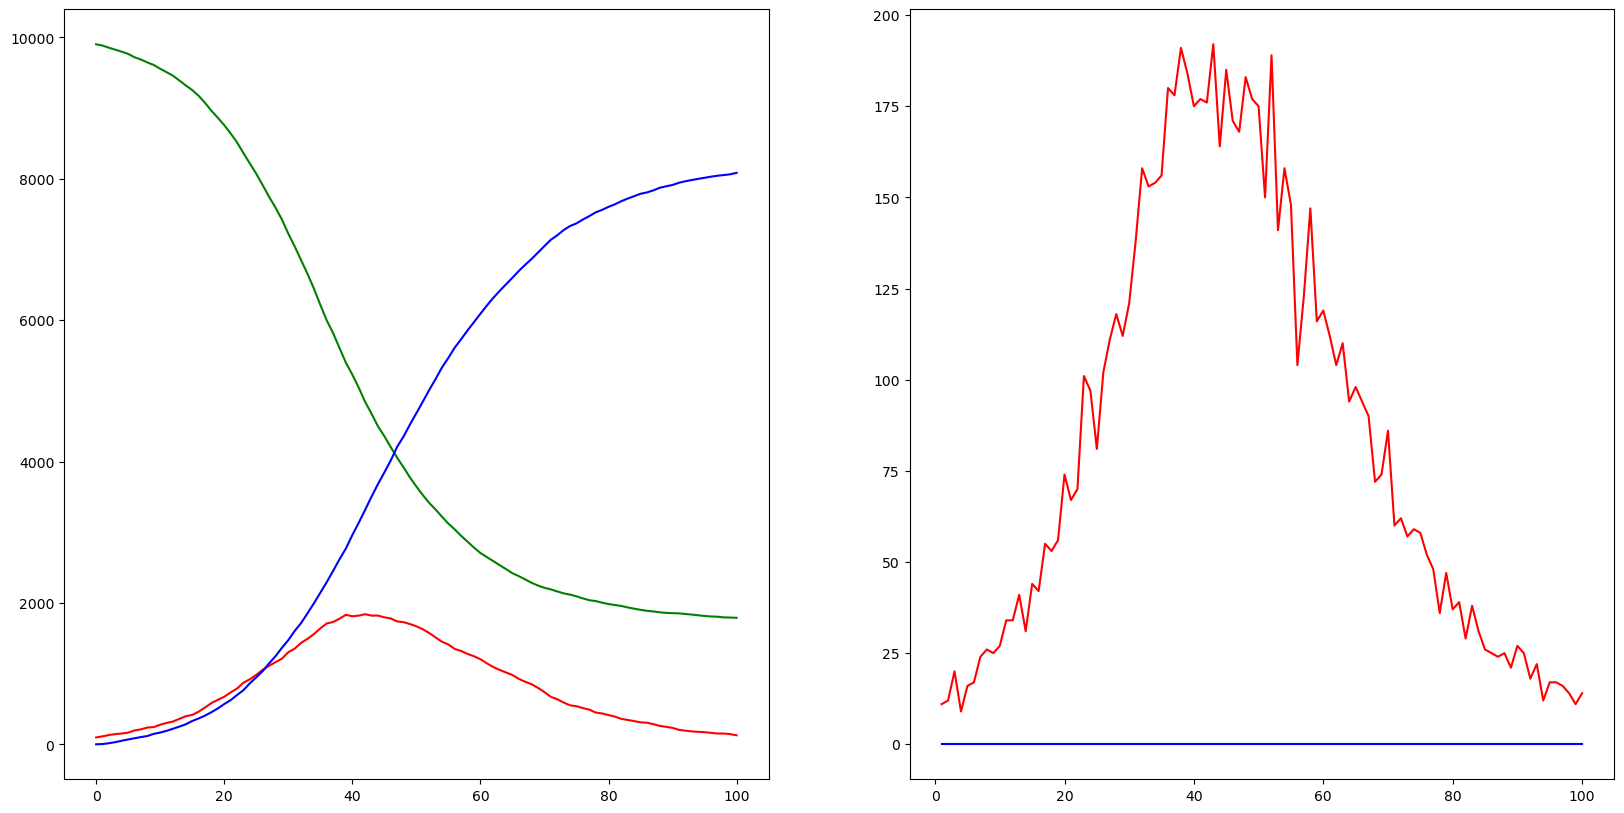

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

time_steps = np.linspace(0, 100, 101)
ax[0].plot(time_steps, X[:,0,0,0], color = "green")
ax[0].plot(time_steps, X[:,0,0,1], color = "red")
ax[0].plot(time_steps, X[:,0,0,2], color = "blue")

ax[1].plot(time_steps[1:], Y[:,0,0,0], color = "green")
ax[1].plot(time_steps[1:], Y[:,0,0,1], color = "red")
ax[1].plot(time_steps[1:], Y[:,0,0,2], color = "blue")

In [45]:
T = 100
n_sim = 100

start = time.time()
X, Y = compartmental_model_simulation(p_0, beta, gamma, q, T, n_sim)

print("We simulated 100 times from the model in ", np.round(time.time()-start, 2))

We simulated 100 times from the model in  0.39


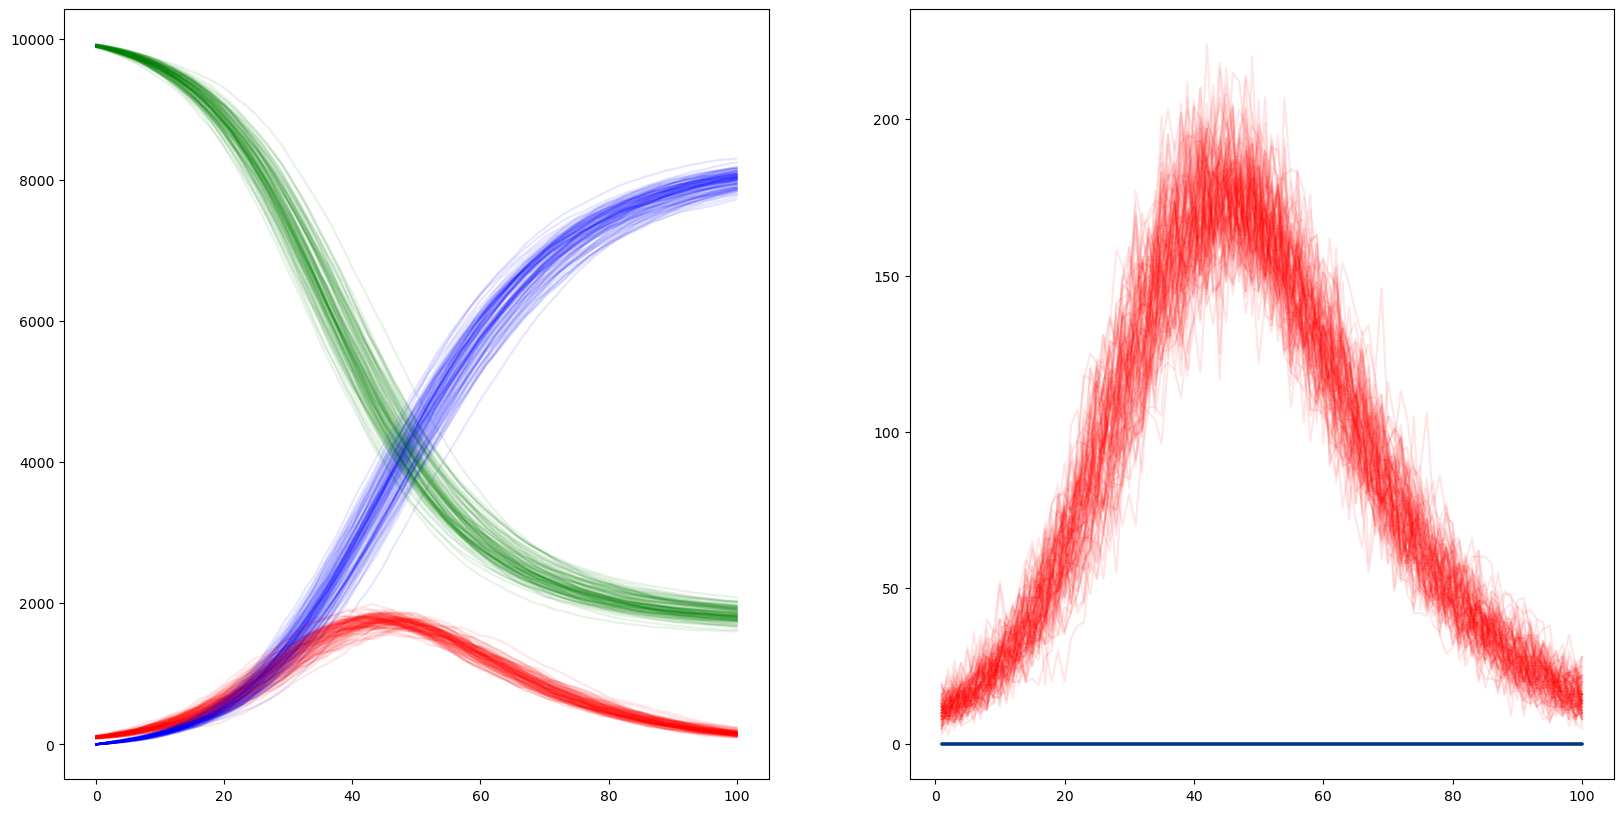

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

time_steps = np.linspace(0, 100, 101)

for s in range(100):
    ax[0].plot(time_steps, X[:,s,0,0], alpha = 0.1, color = "green")
    ax[0].plot(time_steps, X[:,s,0,1], alpha = 0.1, color = "red")
    ax[0].plot(time_steps, X[:,s,0,2], alpha = 0.1, color = "blue")

    ax[1].plot(time_steps[1:], Y[:,s,0,0], alpha = 0.1, color = "green")
    ax[1].plot(time_steps[1:], Y[:,s,0,1], alpha = 0.1, color = "red")
    ax[1].plot(time_steps[1:], Y[:,s,0,2], alpha = 0.1, color = "blue")

In [47]:
N = 1000 # population of 1000 individuals
p_0 = tf.convert_to_tensor([[0.99, 0.01, 0.0], [0.99, 0.01, 0.0], [0.99, 0.01, 0.0]], dtype = tf.float32) # we have a parameter dimension

input_initial_distribution = N
parameters_initial_distribution = p_0

beta  = tf.convert_to_tensor([0.1, 0.3, 0.9], dtype = tf.float32) # again a parameters dimension
gamma = tf.convert_to_tensor([0.1, 0.1, 0.1], dtype = tf.float32) # again a parameters dimension

q = tf.convert_to_tensor([[0.0, 0.1, 0.0], [0.0, 0.1, 0.0], [0.0, 0.1, 0.0]], dtype = tf.float32) # we have again a parameter dimension

start = time.time()
X, Y = compartmental_model_simulation(p_0, beta, gamma, q, T, n_sim)

print("We simulated 100 times from three different models in ", np.round(time.time()-start, 2))

We simulated 100 times from three different models in  21.5


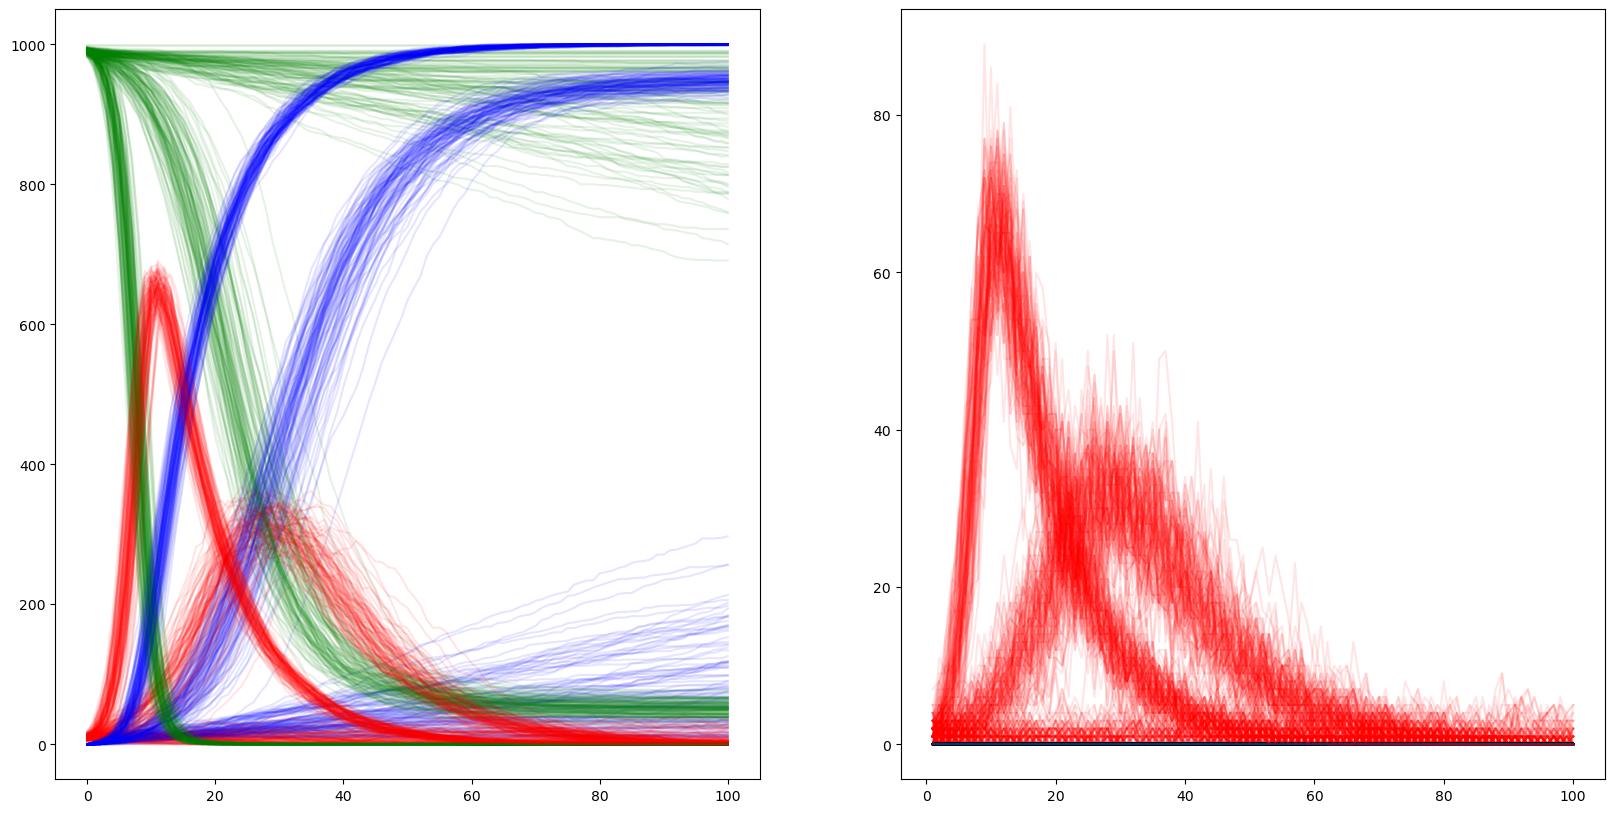

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

time_steps = np.linspace(0, 100, 101)

for p in range(3):
    for s in range(100):
        ax[0].plot(time_steps, X[:,s,p,0], alpha = 0.1, color = "green")
        ax[0].plot(time_steps, X[:,s,p,1], alpha = 0.1, color = "red")
        ax[0].plot(time_steps, X[:,s,p,2], alpha = 0.1, color = "blue")

        ax[1].plot(time_steps[1:], Y[:,s,p,0], alpha = 0.1, color = "green")
        ax[1].plot(time_steps[1:], Y[:,s,p,1], alpha = 0.1, color = "red")
        ax[1].plot(time_steps[1:], Y[:,s,p,2], alpha = 0.1, color = "blue")